In [2]:
from visualize import report_const_experiment, report_experiment, report_experiment_summary, plot_sys_behaviour, \
plot_agent_behaviour, plot_two_perf_dist, plot_agent_sys_exploit_behaviour
%matplotlib inline

# Stochastic case, constant `p_reff` - power reference

In [3]:
case_folder = "ps_stoch/"

## Baseline exeperiment - constant action applied instead of controller-chosen action

## time_step=1s

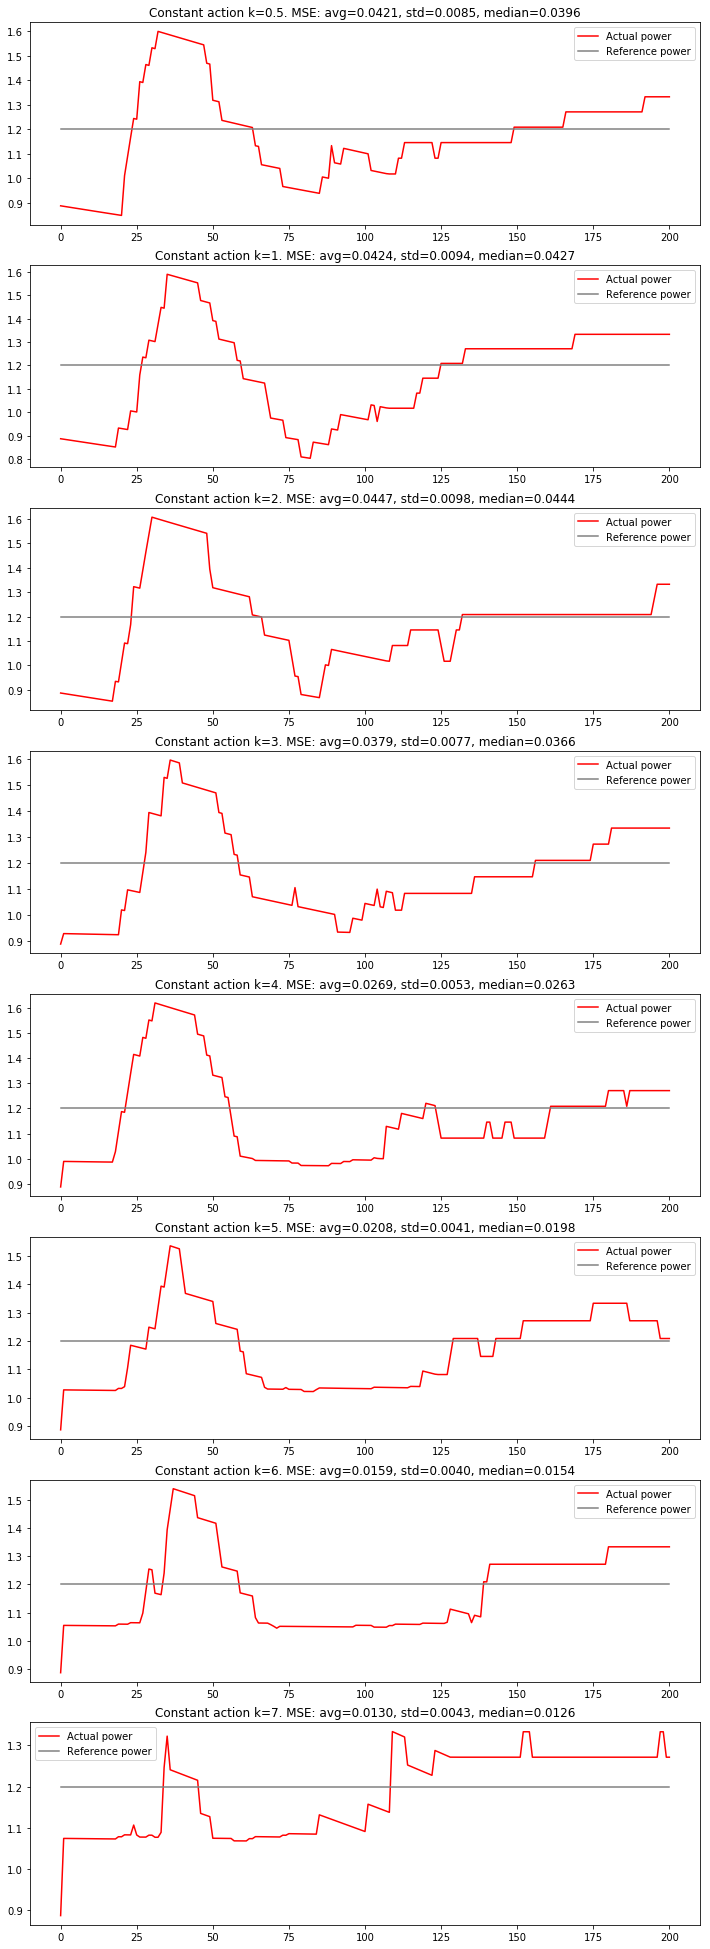

In [4]:
name = case_folder + "new_compete/baseline12_50ep_1s"
report_const_experiment(name, fig_size=(12, 35))

## time_step=5s

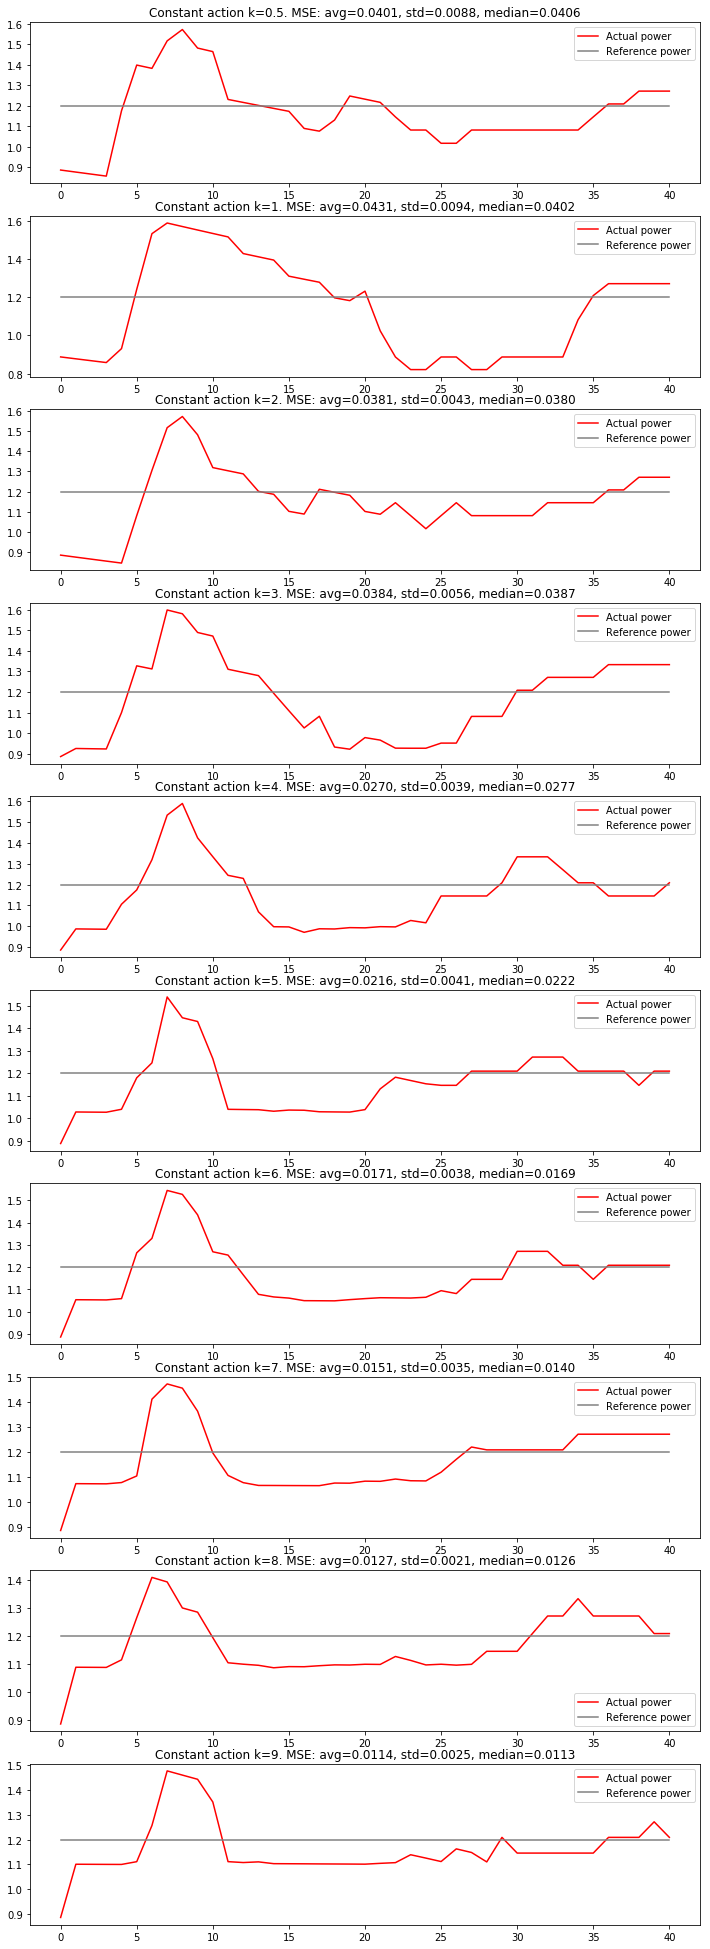

In [4]:
name = case_folder + "constant_action_variation_20-10-2019_21-13"
report_const_experiment(name, fig_size=(12, 35))

## Q-learning
## Q-learning hyperparameters chosen on the p_reff=const case

In [5]:
experiments_folder = case_folder + "best_parameters_combination_19-09-2019_13-33/"
experiment_name = "Stoch.PS, Q-learning:"

Last episode performance: 0.01
Time per simulation step in each experiment: [0.30100934 0.28505123 0.29600173 0.3013342  0.35525025] s
Mean time per simulation step: 0.308 s, std: 0.0245 s
Total execution time: 30772.935 s for 100000 steps -> 0.308 s per step

Median performance (MSE) in exploitation mode 0.0122

Average MSE in exploitation mode 0.0132 +- 0.0039
Average exploitation performance of each agent: 
[0.013215 0.013781 0.013896 0.013091 0.012266]


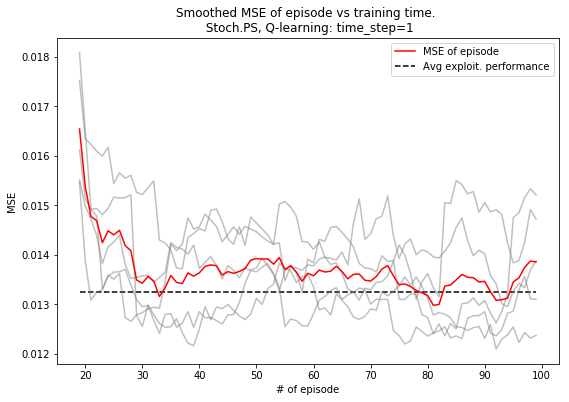

In [6]:
case = "time_step=1"
df_avgsm_mses_1, perf_1, sig_1 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), plot_perf_sigma=0,
                                                         stochastic=False)

Last episode performance: 0.02
Time per simulation step in each experiment: [0.33841488 0.31405417 0.3000132  0.29917935 0.29824352] s
Mean time per simulation step: 0.310 s, std: 0.0154 s
Total execution time: 6199.620 s for 20000 steps -> 0.310 s per step

Median performance (MSE) in exploitation mode 0.0151

Average MSE in exploitation mode 0.0165 +- 0.0038
Average exploitation performance of each agent: 
[0.015009 0.015475 0.01569  0.015653 0.02047 ]


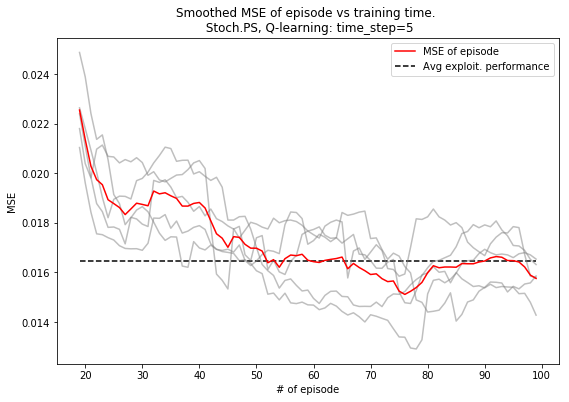

In [7]:
case = "time_step=5"
df_avgsm_mses_2, perf_2, sig_2 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), plot_perf_sigma=0,
                                                         stochastic=False)

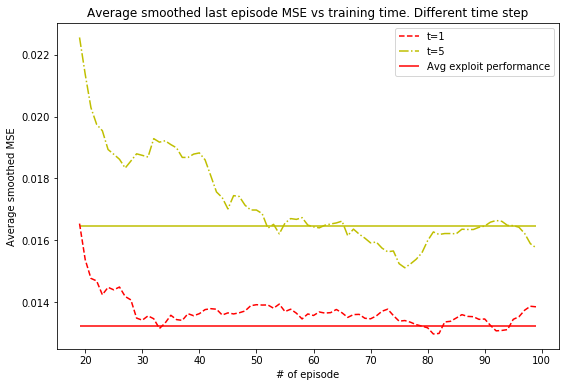

In [8]:
labels = ["t=1", "t=5"]
mses = [df_avgsm_mses_1, df_avgsm_mses_2]
perfs = [perf_1, perf_2]
sigs = [sig_1, sig_2]
report_experiment_summary("Different time step", mses, perfs, sigs, labels, 0)

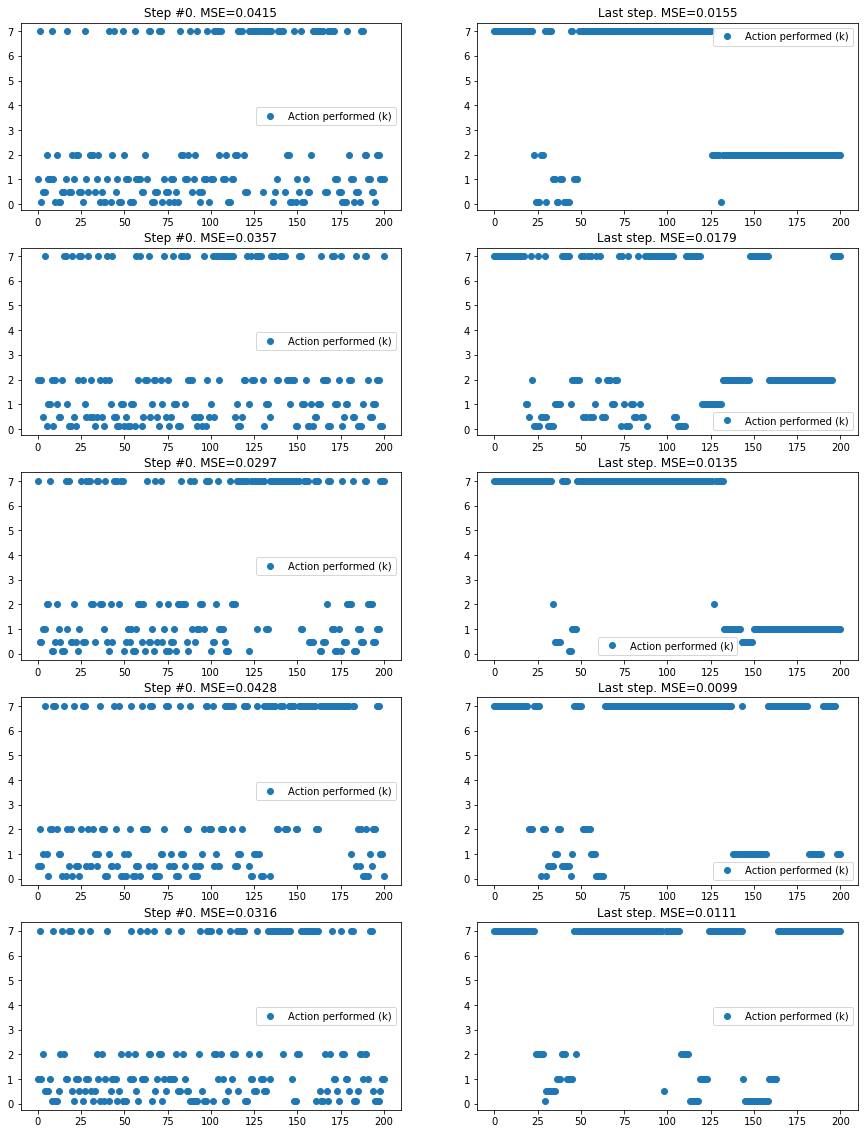

In [9]:
plot_agent_behaviour(experiments_folder + "/time_step=1")

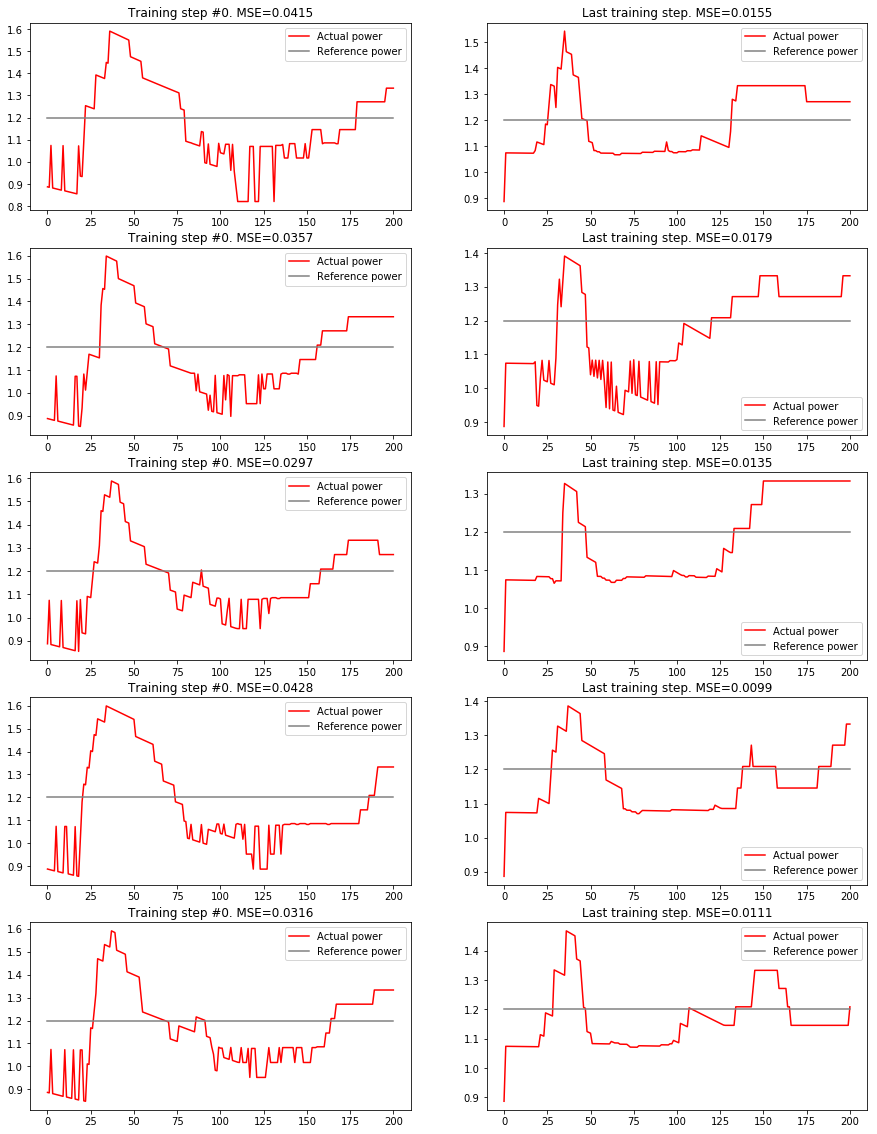

In [10]:
plot_sys_behaviour(experiments_folder + "/time_step=1")

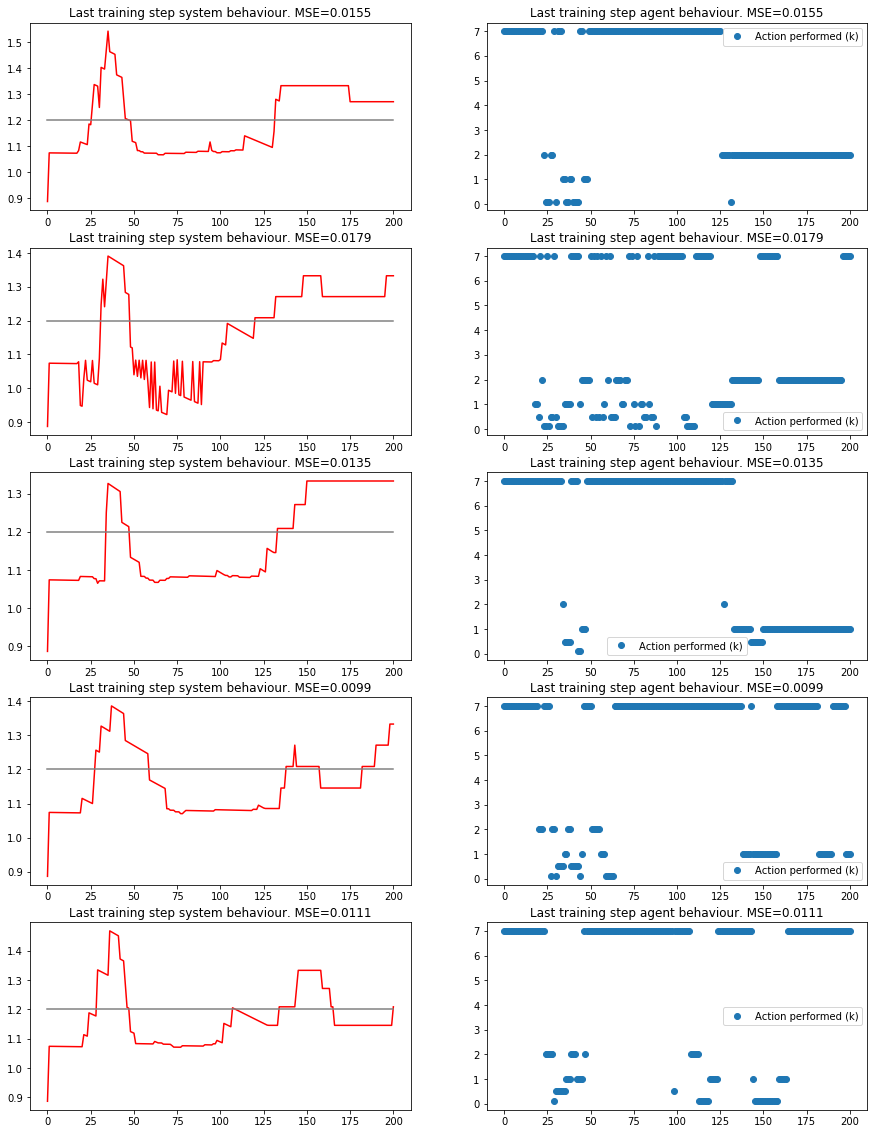

In [11]:
plot_agent_sys_exploit_behaviour(experiments_folder + "/time_step=1")

# Longer training

In [12]:
experiment_name = "Stoch.PS, Q-learning, 200 episodes training:"

Last episode performance: 0.01
Time per simulation step in each experiment: [0.39213438 0.38031406 0.38568132 0.39354367 0.39983601] s
Mean time per simulation step: 0.390 s, std: 0.0067 s
Total execution time: 78060.378 s for 200000 steps -> 0.390 s per step

Median performance (MSE) in exploitation mode 0.0125

Average MSE in exploitation mode 0.0134 +- 0.0013
Average exploitation performance of each agent: 
[0.013244  0.0132805 0.013416  0.0134845 0.0136585]


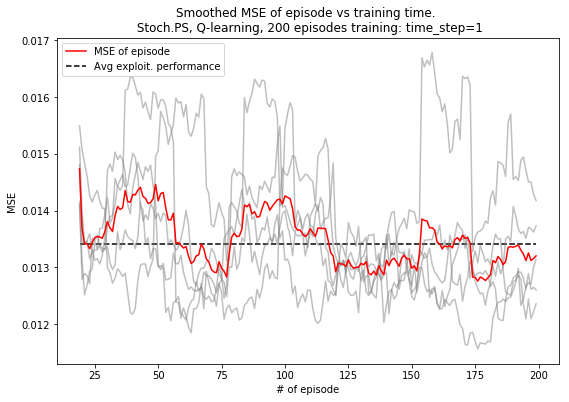

In [13]:
experiments_folder = case_folder + "best_params_longer_train_20-10-2019_23-19/"
case = "time_step=1"
df_avgsm_mses_l1, perf_l1, sig_l1 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), plot_perf_sigma=0,
                                                         stochastic=False)

Last episode performance: 0.02
Time per simulation step in each experiment: [0.21039866 0.19113214 0.1864609  0.18326302 0.18353369] s
Mean time per simulation step: 0.191 s, std: 0.0101 s
Total execution time: 7638.307 s for 40000 steps -> 0.191 s per step

Median performance (MSE) in exploitation mode 0.0145

Average MSE in exploitation mode 0.0152 +- 0.0025
Average exploitation performance of each agent: 
[0.01494  0.015192 0.016278 0.01477  0.014946]


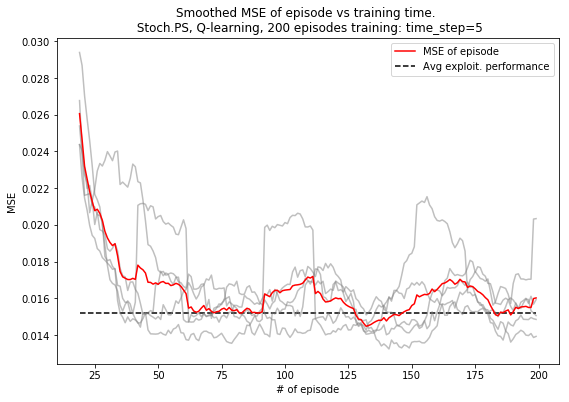

In [14]:
experiments_folder = case_folder + "best_params_longer_train_21-10-2019_22-06/"
case = "time_step=5"
df_avgsm_mses_l2, perf_l2, sig_l2 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), plot_perf_sigma=0,
                                                         stochastic=False)

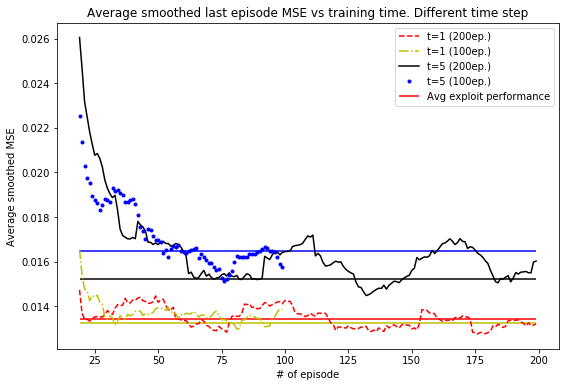

In [15]:
labels = ["t=1 (200ep.)", "t=1 (100ep.)", "t=5 (200ep.)", "t=5 (100ep.)"]
mses = [df_avgsm_mses_l1, df_avgsm_mses_1, df_avgsm_mses_l2, df_avgsm_mses_2]
perfs = [perf_l1, perf_1, perf_l2, perf_2]
sigs = [sig_l1, sig_1, sig_l2, sig_2]
report_experiment_summary("Different time step", mses, perfs, sigs, labels, 0)

## Performance distributions:

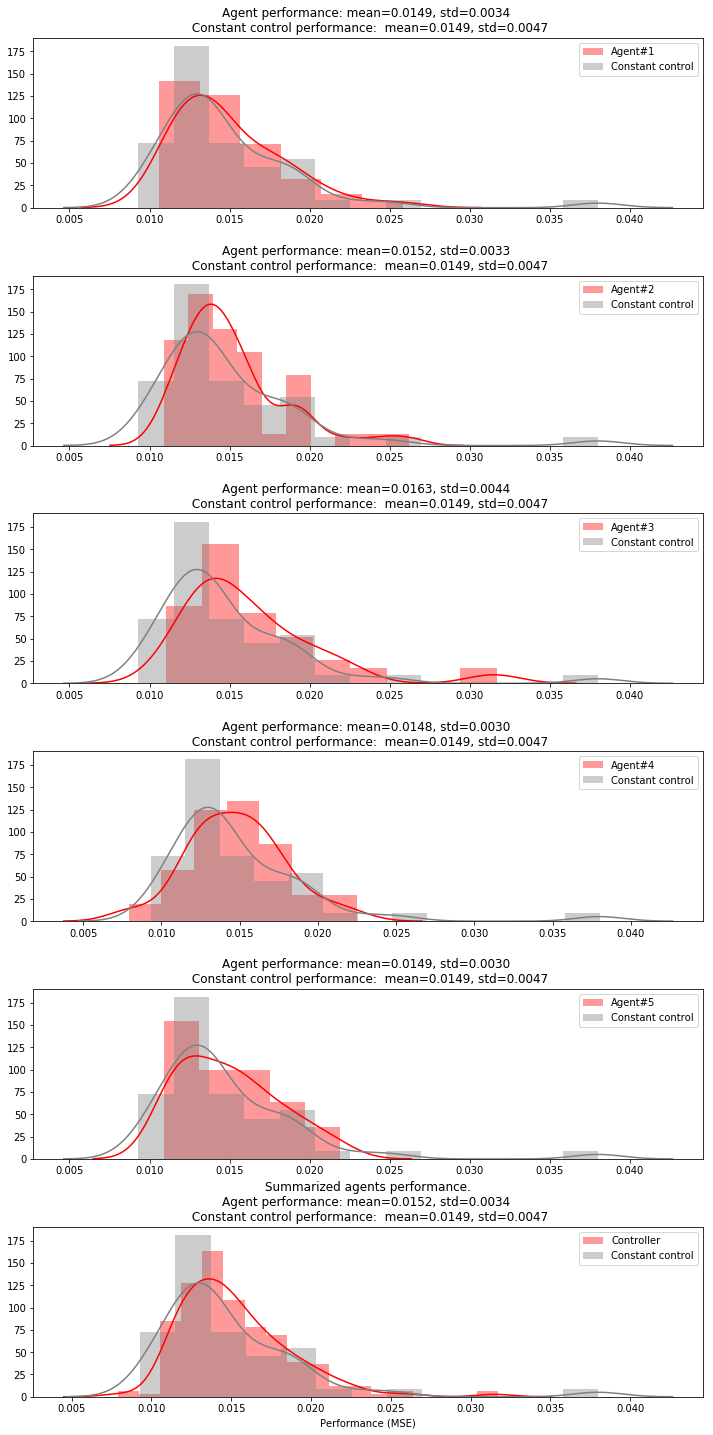

In [6]:
controller = case_folder + "best_params_longer_train_21-10-2019_22-06/time_step=5"
baseline = case_folder + "new_compete/baseline12_50ep_5s/k=7"
plot_two_perf_dist(baseline, controller);

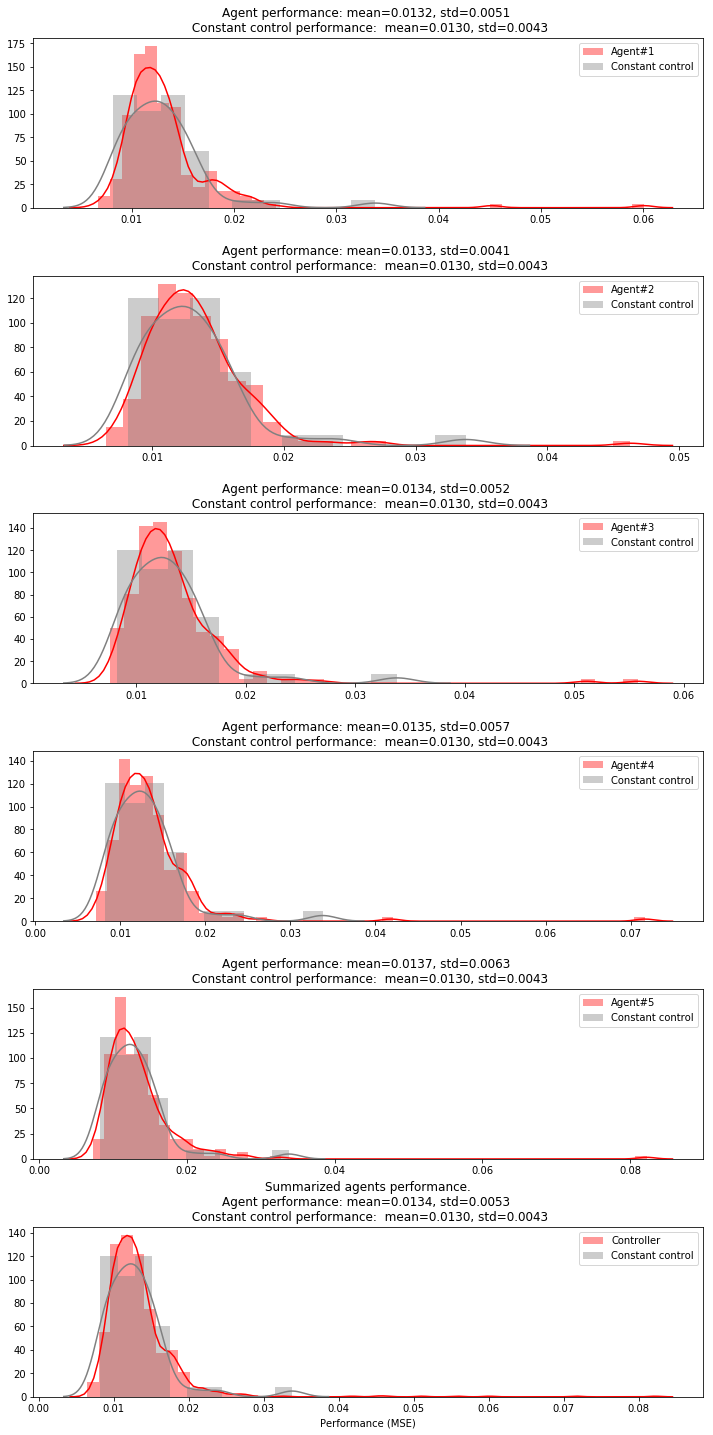

In [7]:
controller = case_folder + "best_params_longer_train_20-10-2019_23-19/time_step=1"
baseline = case_folder + "new_compete/baseline12_50ep_1s/k=7"
plot_two_perf_dist(baseline, controller);

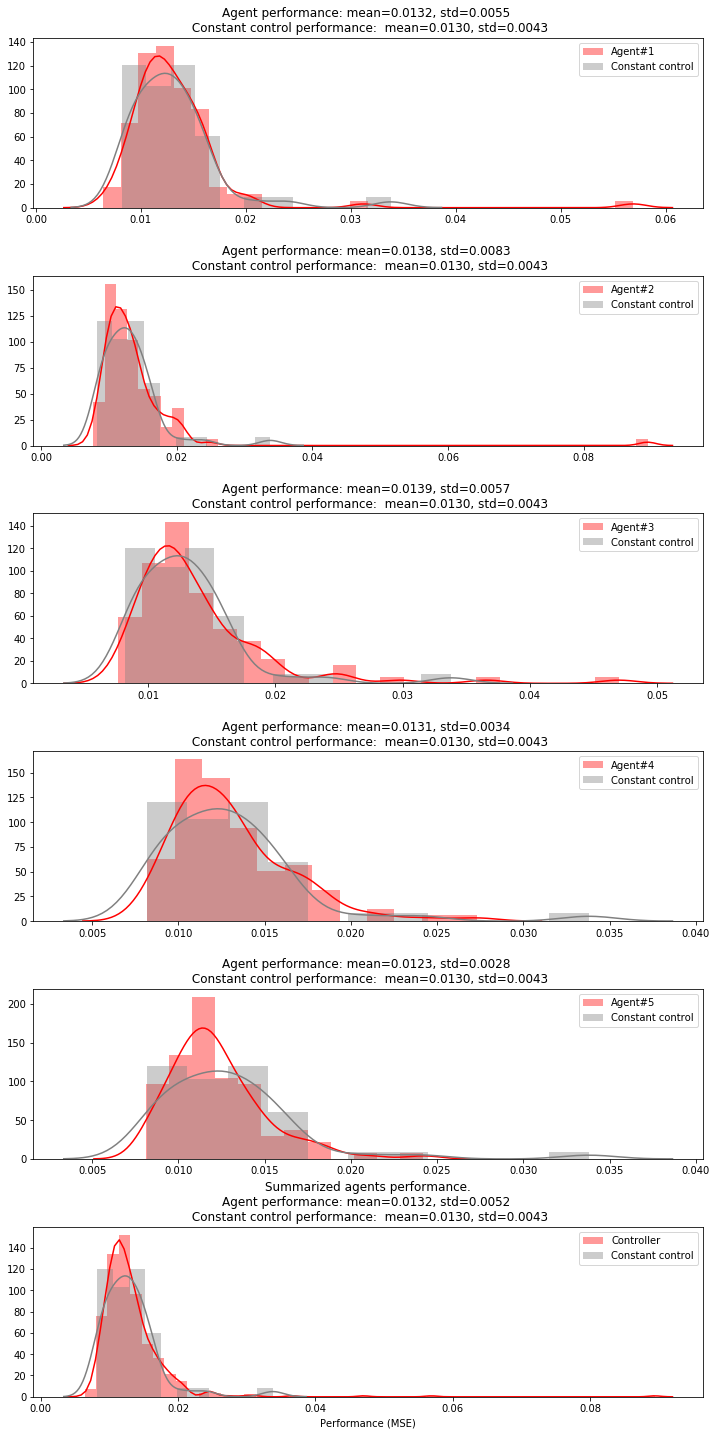

In [8]:
controller = case_folder + "best_parameters_combination_19-09-2019_13-33/time_step=1"
baseline = case_folder + "new_compete/baseline12_50ep_1s/k=7"
plot_two_perf_dist(baseline, controller);

## Hyperparameters search

## 1. Different action spaces

In [18]:
experiments_folder = case_folder + "action_space(k_s)_variation_25-10-2019_23-16/"
experiment_name = "Stoch.PS, Q-learning, Action space variation:"

Last episode performance: 0.01
Time per simulation step in each experiment: [0.20312539 0.2031221  0.20357782 0.20376139 0.20414905] s
Mean time per simulation step: 0.204 s, std: 0.0004 s
Total execution time: 20354.715 s for 100000 steps -> 0.204 s per step

Average MSE in exploitation mode 0.0133 +- 0.0008
Average exploitation performance of each agent: 
[0.012952 0.013362 0.013258 0.013142 0.013828]


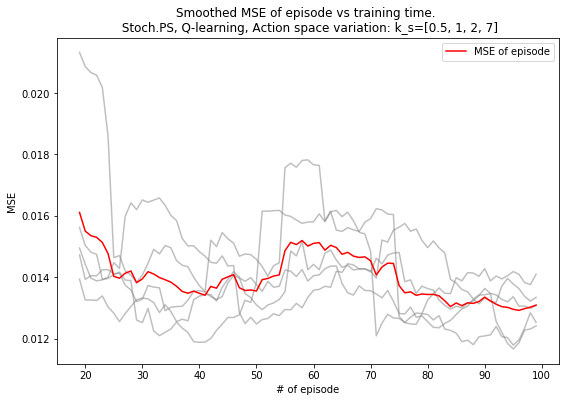

In [19]:
case = "k_s=[0.5, 1, 2, 7]"
df_ks_2_avgsm_mses, perf_ks2, sig_ks2 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

Last episode performance: 0.01
Time per simulation step in each experiment: [0.20319561 0.20329922 0.20321004 0.20333116 0.20350217] s
Mean time per simulation step: 0.203 s, std: 0.0001 s
Total execution time: 20330.764 s for 100000 steps -> 0.203 s per step

Average MSE in exploitation mode 0.0139 +- 0.0011
Average exploitation performance of each agent: 
[0.012828 0.013888 0.01319  0.014322 0.015238]


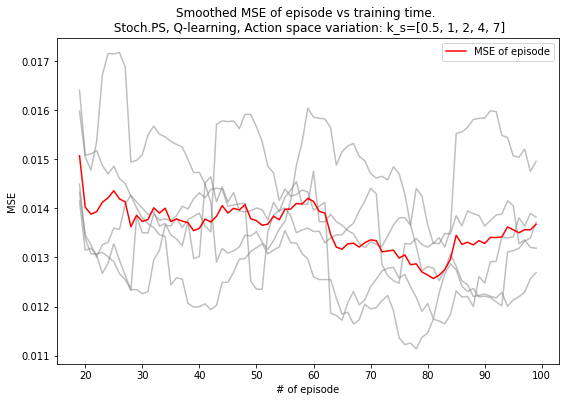

In [20]:
case = "k_s=[0.5, 1, 2, 4, 7]"
df_ks_3_avgsm_mses, perf_ks3, sig_ks3 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

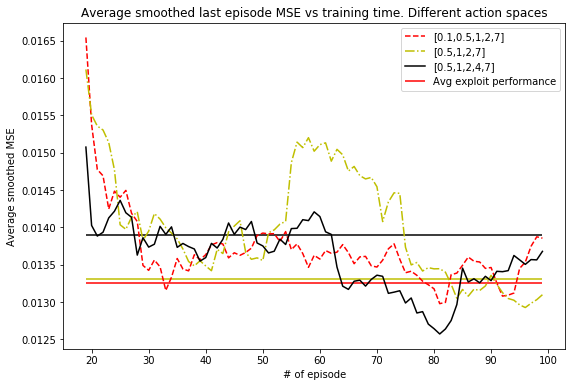

In [21]:
labels = ["[0.1,0.5,1,2,7]", "[0.5,1,2,7]", "[0.5,1,2,4,7]"]
mses = [df_avgsm_mses_1, df_ks_2_avgsm_mses, df_ks_3_avgsm_mses]
perfs = [perf_1, perf_ks2, perf_ks3]
sigs = [sig_1, sig_ks2, sig_ks3]
report_experiment_summary("Different action spaces", mses, perfs, sigs, labels, 0)

In [22]:
experiments_folder = case_folder + "action_space(k_s)_variation_26-10-2019_18-07/"
experiment_name = "Stoch.PS, Q-learning, Action space variation:"

Last episode performance: 0.01
Time per simulation step in each experiment: [0.21257569 0.20924633 0.20511698 0.20509267 0.2049436 ] s
Mean time per simulation step: 0.207 s, std: 0.0031 s
Total execution time: 20739.505 s for 100000 steps -> 0.207 s per step

Average MSE in exploitation mode 0.0131 +- 0.0024
Average exploitation performance of each agent: 
[0.013036 0.012668 0.011592 0.013834 0.014362]


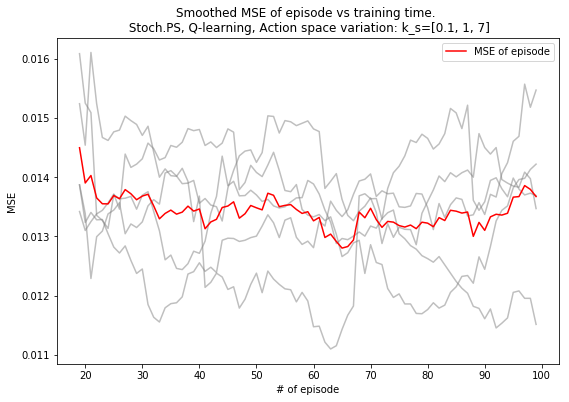

In [23]:
case = "k_s=[0.1, 1, 7]"
df_ks_4_avgsm_mses, perf_ks4, sig_ks4 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

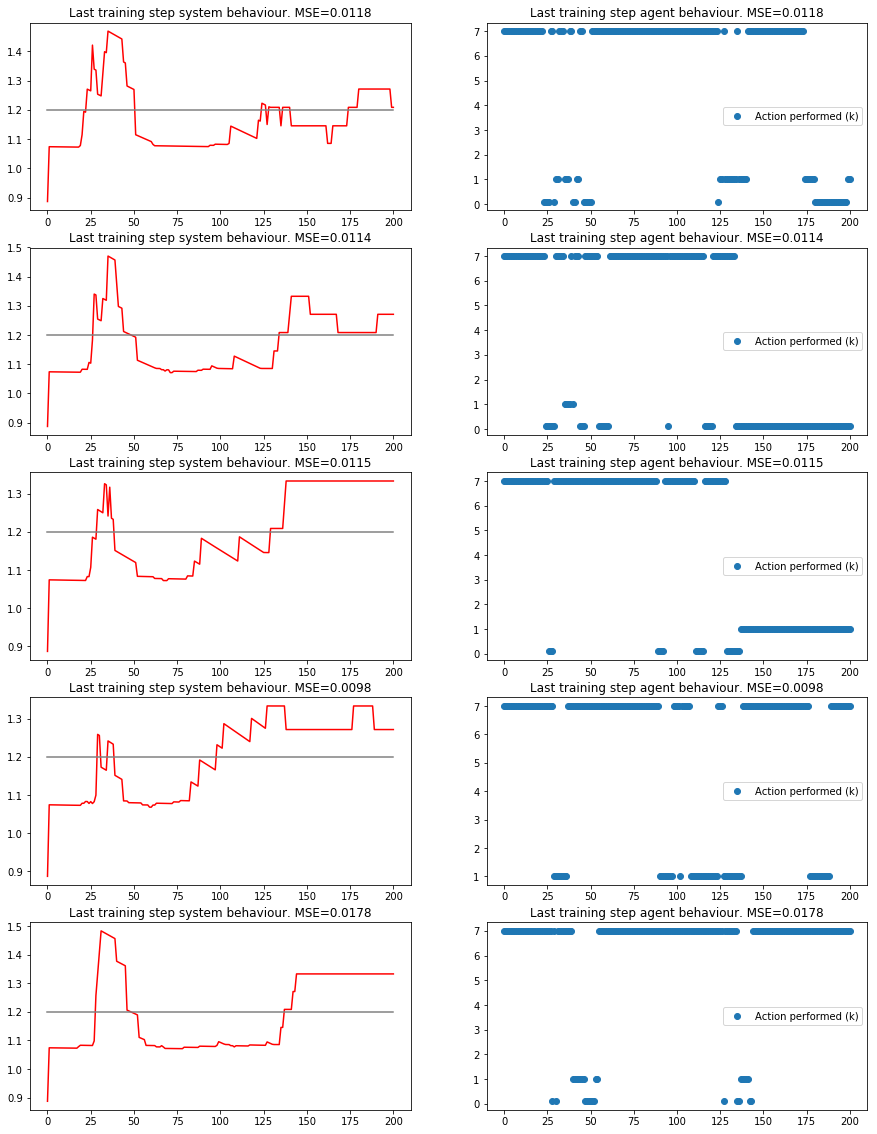

In [24]:
plot_agent_sys_exploit_behaviour(experiments_folder + case)

Last episode performance: 0.01
Time per simulation step in each experiment: [0.20435702 0.20476369 0.20467936 0.20540437 0.20529016] s
Mean time per simulation step: 0.205 s, std: 0.0004 s
Total execution time: 20489.892 s for 100000 steps -> 0.205 s per step

Average MSE in exploitation mode 0.0139 +- 0.0029
Average exploitation performance of each agent: 
[0.012134 0.013726 0.01367  0.014656 0.015366]


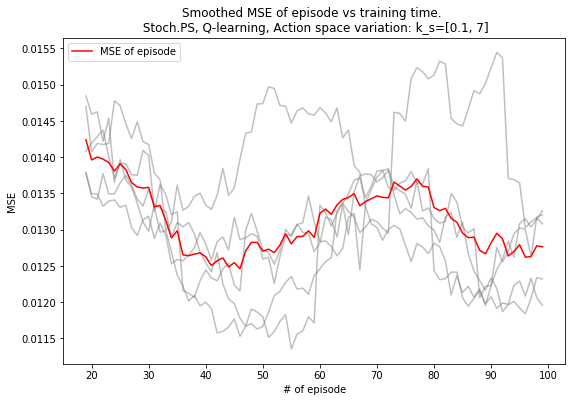

In [25]:
case = "k_s=[0.1, 7]"
df_ks_5_avgsm_mses, perf_ks5, sig_ks5 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

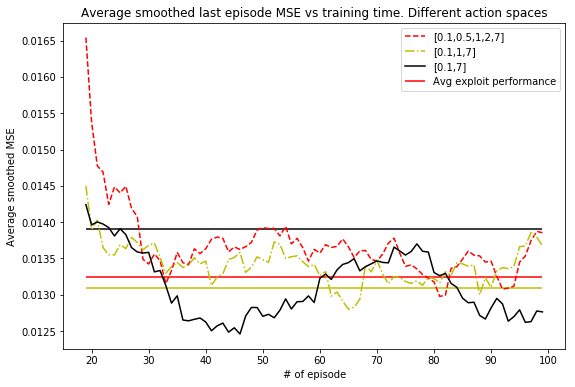

In [26]:
labels = ["[0.1,0.5,1,2,7]", "[0.1,1,7]", "[0.1,7]"]
mses = [df_avgsm_mses_1, df_ks_4_avgsm_mses, df_ks_5_avgsm_mses]
perfs = [perf_1, perf_ks4, perf_ks5]
sigs = [sig_1, sig_ks4, sig_ks5]
report_experiment_summary("Different action spaces", mses, perfs, sigs, labels, 0)

## 2. Exploration rate variation

In [27]:
experiments_folder = case_folder + "exploration(rate_and_discount)_variation_25-10-2019_11-33/"
experiment_name = "Det.PS, Q-learning, Exploration parameters variation:"

Last episode performance: 0.01
Time per simulation step in each experiment: [0.20764481 0.20353537 0.20352939 0.20314528 0.20496746] s
Mean time per simulation step: 0.205 s, std: 0.0017 s
Total execution time: 20456.446 s for 100000 steps -> 0.205 s per step

Average MSE in exploitation mode 0.0137 +- 0.0023
Average exploitation performance of each agent: 
[0.013086 0.012866 0.013712 0.01295  0.01569 ]


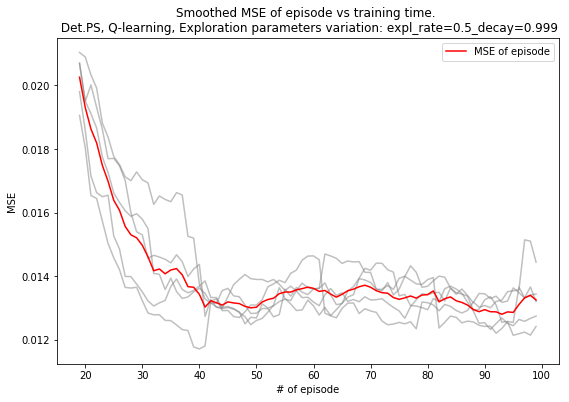

In [28]:
case = "expl_rate=0.5_decay=0.999"
df_expl1_avgsm_mses, perf_expl1, sig_expl1 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

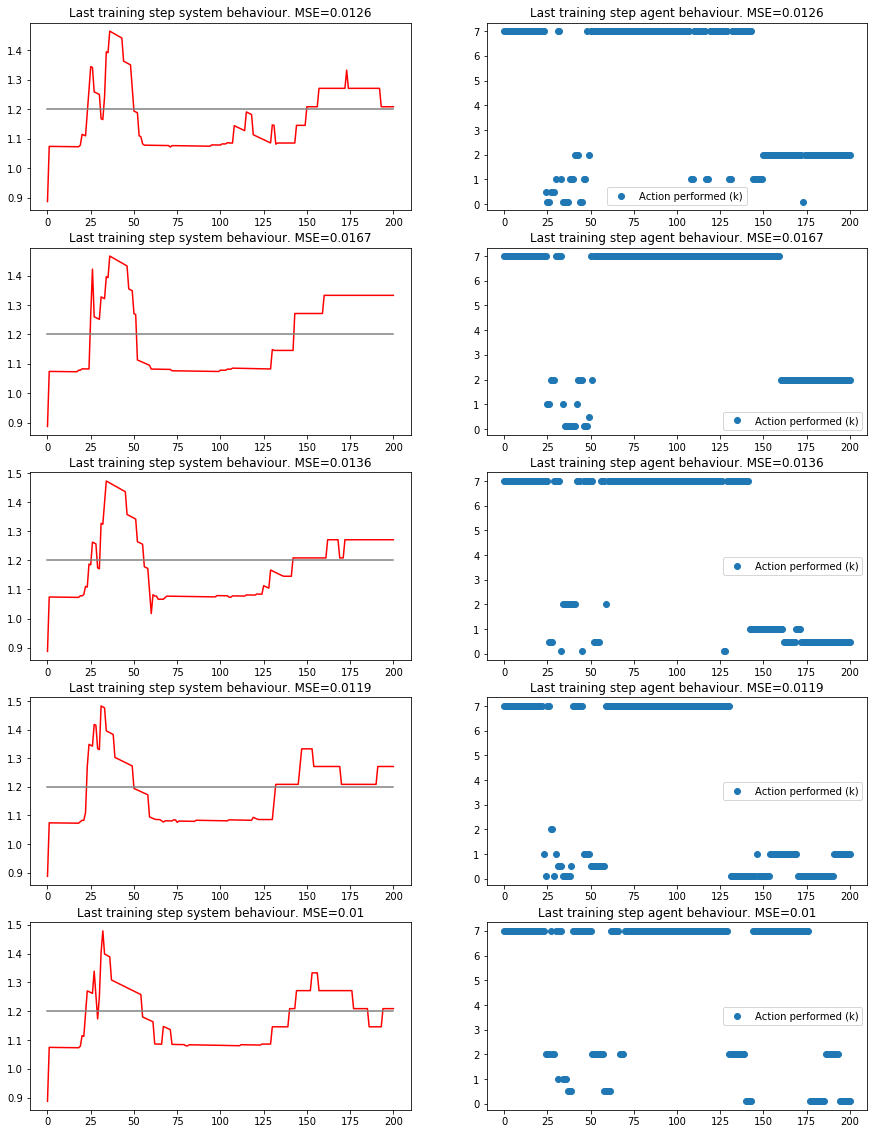

In [29]:
plot_agent_sys_exploit_behaviour(experiments_folder + case)

Last episode performance: 0.01
Time per simulation step in each experiment: [0.20533926 0.23073079 0.21257677 0.21645126 0.20991841] s
Mean time per simulation step: 0.215 s, std: 0.0087 s
Total execution time: 21500.330 s for 100000 steps -> 0.215 s per step

Average MSE in exploitation mode 0.0134 +- 0.0059
Average exploitation performance of each agent: 
[0.013756 0.01268  0.013048 0.013294 0.014326]


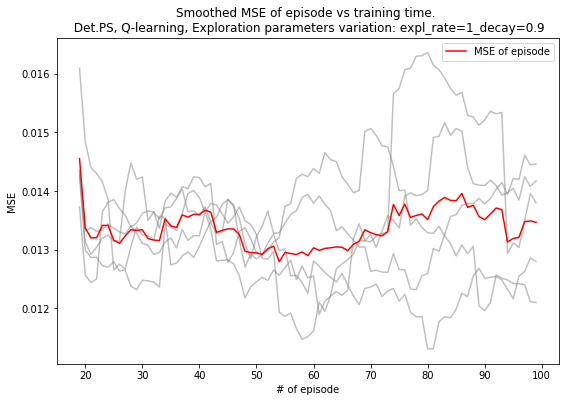

In [30]:
case = "expl_rate=1_decay=0.9"
df_expl2_avgsm_mses, perf_expl2, sig_expl2 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

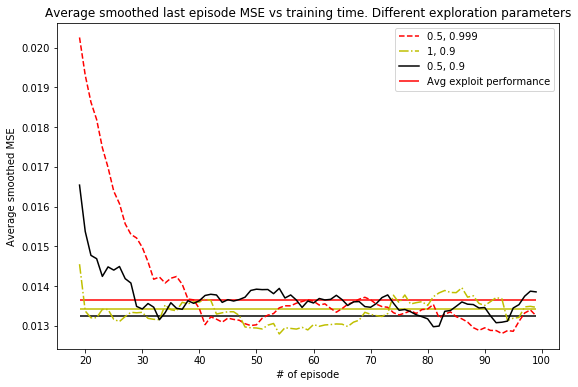

In [31]:
labels = ["0.5, 0.999", "1, 0.9", "0.5, 0.9"]
mses = [df_expl1_avgsm_mses, df_expl2_avgsm_mses, df_avgsm_mses_1]
perfs = [perf_expl1, perf_expl2, perf_1]
sigs = [sig_expl1, sig_expl2, sig_1]
report_experiment_summary("Different exploration parameters", mses, perfs, sigs, labels, 0)

## 3. Learning rate variation

In [32]:
experiments_folder = case_folder + "learning_rate_variation_24-10-2019_22-46/"
experiment_name = "Det.PS, Q-learning, Learning rate variation:"

Last episode performance: 0.01
Time per simulation step in each experiment: [0.20748326 0.2078559  0.20671149 0.20665064 0.2062968 ] s
Mean time per simulation step: 0.207 s, std: 0.0006 s
Total execution time: 20699.962 s for 100000 steps -> 0.207 s per step

Average MSE in exploitation mode 0.0131 +- 0.0037
Average exploitation performance of each agent: 
[0.012588 0.012842 0.01276  0.014274 0.013142]


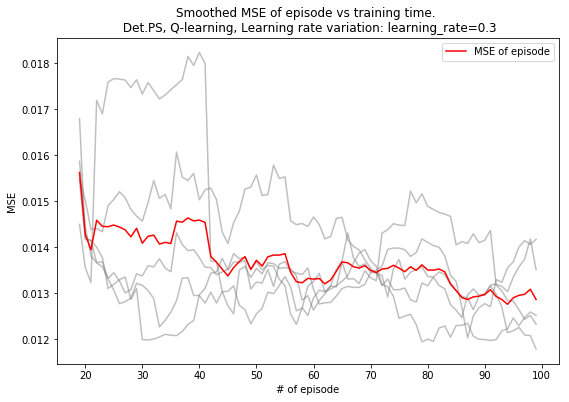

In [33]:
case = "learning_rate=0.3"
df_lr1_avgsm_mses, perf_lr1, sig_lr1 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

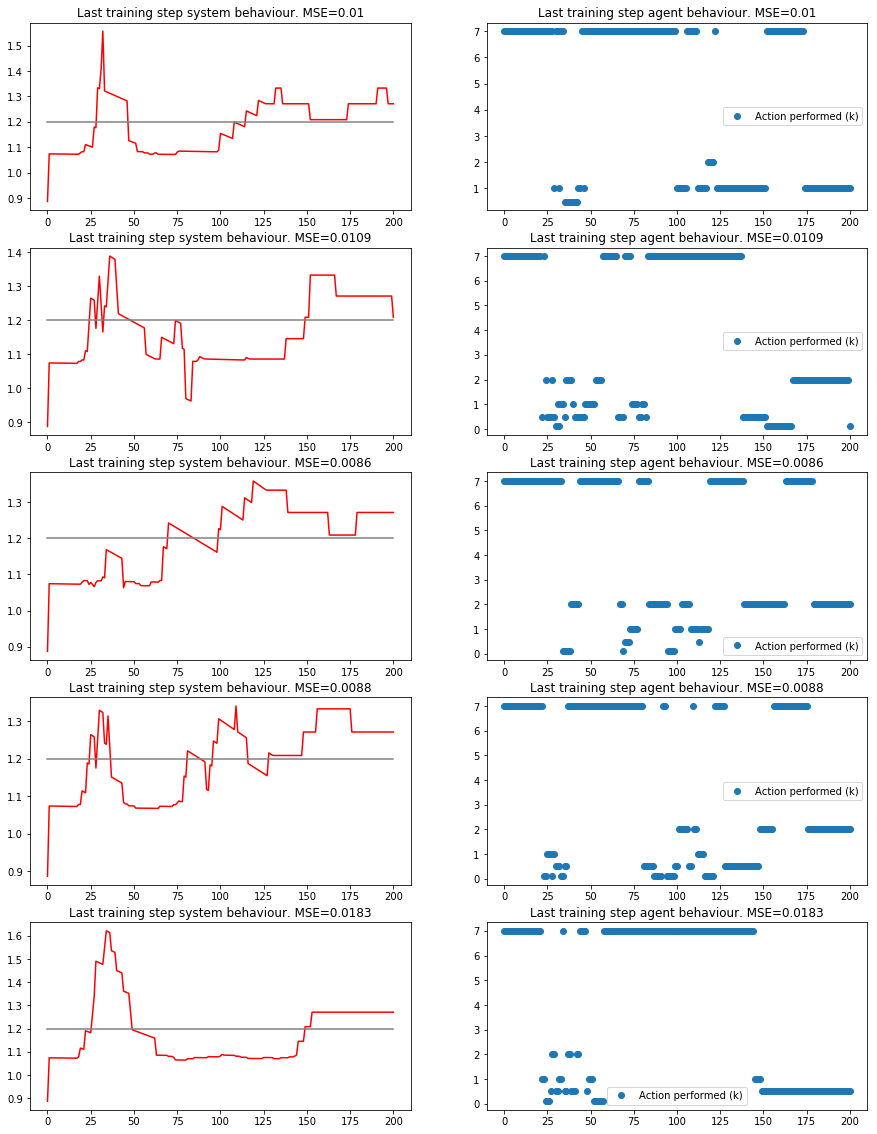

In [34]:
plot_agent_sys_exploit_behaviour(experiments_folder + case)

Last episode performance: 0.01
Time per simulation step in each experiment: [0.20484525 0.20475328 0.20569763 0.20523808 0.20624648] s
Mean time per simulation step: 0.205 s, std: 0.0006 s
Total execution time: 20535.614 s for 100000 steps -> 0.205 s per step

Average MSE in exploitation mode 0.0139 +- 0.0031
Average exploitation performance of each agent: 
[0.0131   0.01622  0.013286 0.013282 0.013514]


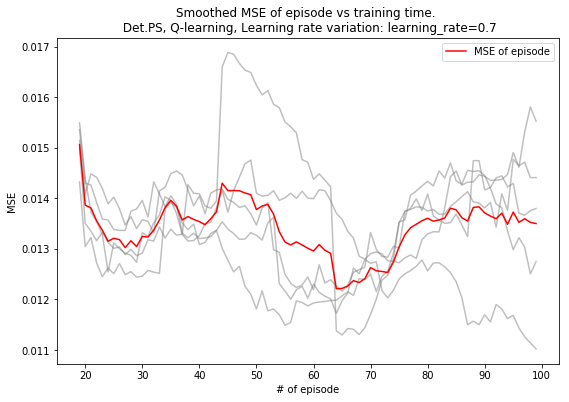

In [35]:
case = "learning_rate=0.7"
df_lr2_avgsm_mses, perf_lr2, sig_lr2 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

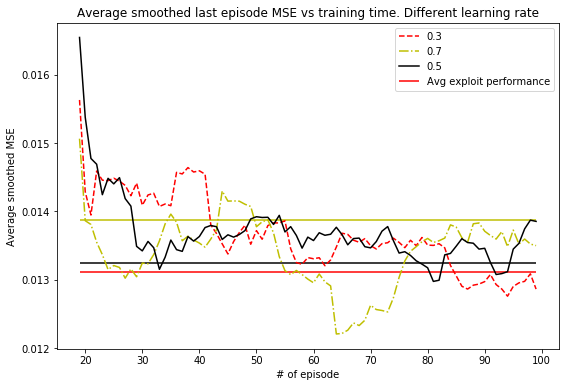

In [36]:
labels = ["0.3", "0.7", "0.5"]
mses = [df_lr1_avgsm_mses, df_lr2_avgsm_mses, df_avgsm_mses_1]
perfs = [perf_lr1, perf_lr2, perf_1]
sigs = [sig_lr1, sig_lr2, sig_1]
report_experiment_summary("Different learning rate", mses, perfs, sigs, labels, 0)

## 5. Discount factor variation

In [37]:
experiments_folder = case_folder + "discount_factor_variation_26-10-2019_11-10/"
experiment_name = "Det.PS, Q-learning, Discount factor variation:"

Last episode performance: 0.01
Time per simulation step in each experiment: [0.20386373 0.21547216 0.21565489 0.21649218 0.22135986] s
Mean time per simulation step: 0.215 s, std: 0.0058 s
Total execution time: 21456.856 s for 100000 steps -> 0.215 s per step

Average MSE in exploitation mode 0.0137 +- 0.0019
Average exploitation performance of each agent: 
[0.013556 0.013826 0.014096 0.013858 0.013324]


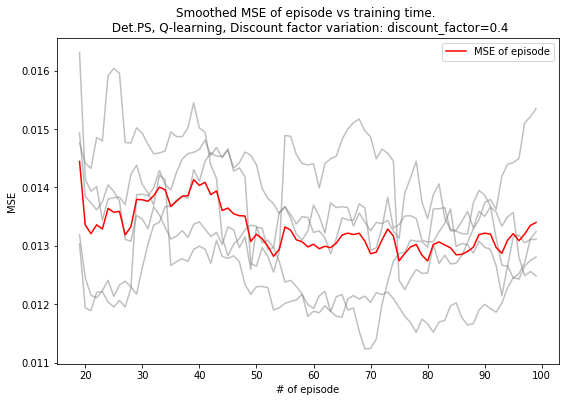

In [38]:
case = "discount_factor=0.4"
df_df1_avgsm_mses, perf_df1, sig_df1 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

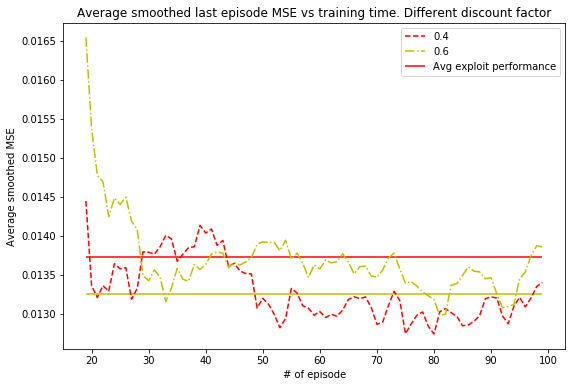

In [39]:
labels = ["0.4", "0.6"]
mses = [df_df1_avgsm_mses, df_avgsm_mses_1]
perfs = [perf_df1, perf_1]
sigs = [sig_df1, sig_1]
report_experiment_summary("Different discount factor", mses, perfs, sigs, labels, 0)

## 6. Reward variation

In [55]:
experiments_folder = case_folder + "reward_variation_23-10-2019_12-52/"
experiment_name = "Det.PS, Q-learning, Reward method variation:"

Last episode performance: 0.01
Time per simulation step in each experiment: [0.20620366 0.20633153 0.20717839 0.2075609  0.20782681] s
Mean time per simulation step: 0.207 s, std: 0.0006 s
Total execution time: 20702.026 s for 100000 steps -> 0.207 s per step

Average MSE in exploitation mode 0.0131 +- 0.0015
Average exploitation performance of each agent: 
[0.013378 0.012948 0.013222 0.01331  0.012754]


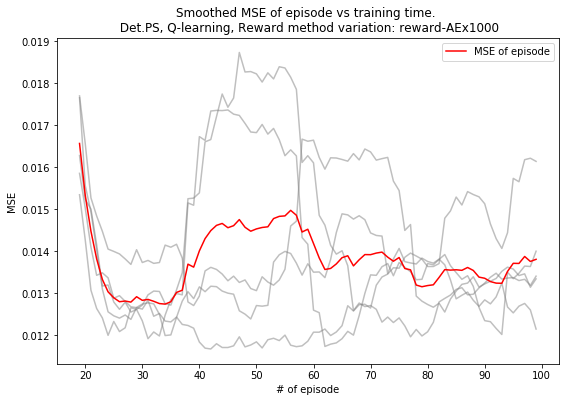

In [56]:
case = "reward-AEx1000"
df_rw1_avgsm_mses, perf_rw1, sig_rw1 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

Last episode performance: 0.01
Time per simulation step in each experiment: [0.384001   0.29202855 0.30069602 0.27753775 0.27465353] s
Mean time per simulation step: 0.306 s, std: 0.0402 s
Total execution time: 30578.337 s for 100000 steps -> 0.306 s per step

Average MSE in exploitation mode 0.0135 +- 0.0018
Average exploitation performance of each agent: 
[0.013842 0.013281 0.013702 0.013362 0.013199]


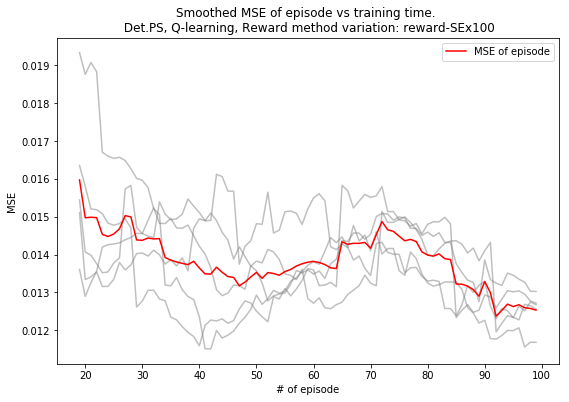

In [57]:
case = "reward-SEx100"
df_rw2_avgsm_mses, perf_rw2, sig_rw2 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

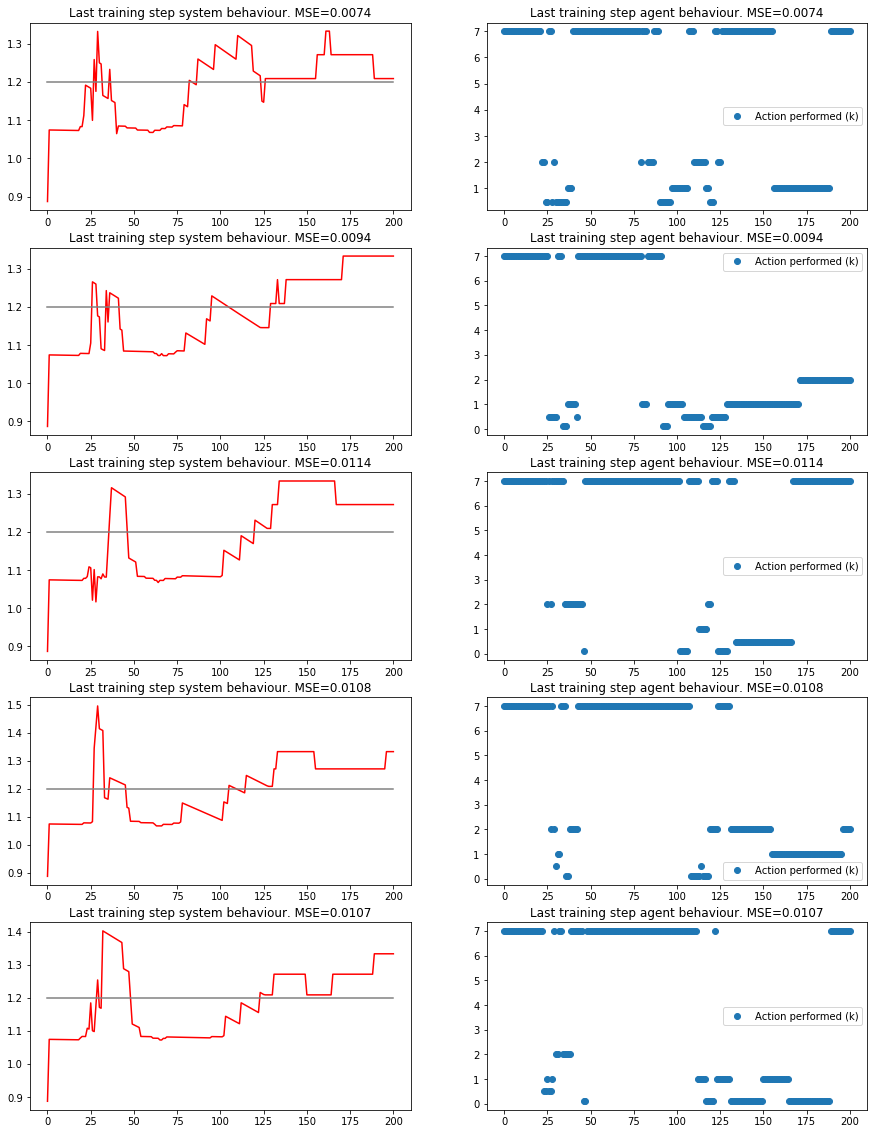

In [59]:
plot_agent_sys_exploit_behaviour(experiments_folder + case)

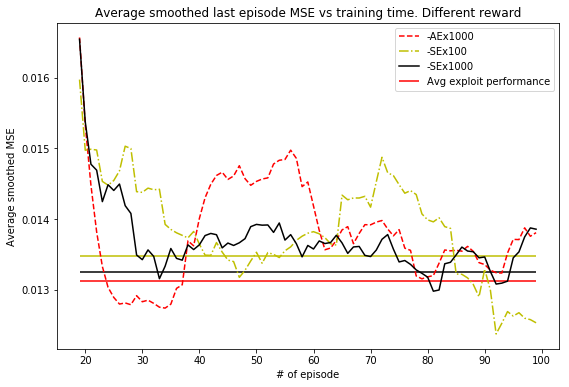

In [58]:
labels = ["-AEx1000", "-SEx100", "-SEx1000"]
mses = [df_rw1_avgsm_mses, df_rw2_avgsm_mses, df_avgsm_mses_1]
perfs = [perf_rw1, perf_rw2, perf_1]
sigs = [sig_rw1, sig_rw2, sig_1]
report_experiment_summary("Different reward", mses, perfs, sigs, labels, 0)

In [60]:
experiments_folder = case_folder + "best_params_inverse_rewards_22-11-2019_11-28/"
experiment_name = "Det.PS, Q-learning, Reward method variation:"

Last episode performance: 0.04
Time per simulation step in each experiment: [0.20868787 0.20629513 0.20697076 0.22322198 0.21335033] s
Mean time per simulation step: 0.212 s, std: 0.0063 s
Total execution time: 21170.521 s for 100000 steps -> 0.212 s per step

Average MSE in exploitation mode 0.0401 +- 0.0064
Average exploitation performance of each agent: 
[0.03826  0.040188 0.042176 0.04037  0.039332]


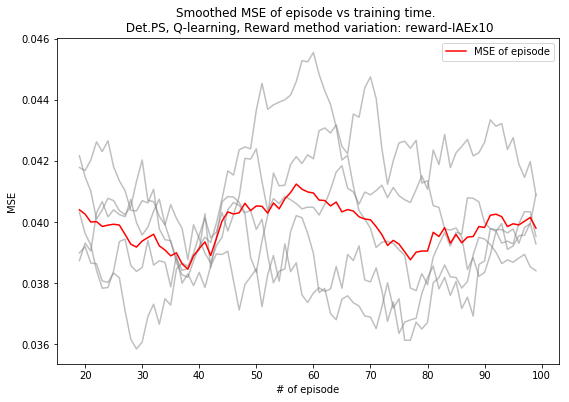

In [61]:
case = "reward-IAEx10"
df_rw1_avgsm_mses, perf_rw1, sig_rw1 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

Last episode performance: 0.04
Time per simulation step in each experiment: [0.21020134 0.2075204  0.20946329 0.20903837 0.20832537] s
Mean time per simulation step: 0.209 s, std: 0.0009 s
Total execution time: 20890.975 s for 100000 steps -> 0.209 s per step

Average MSE in exploitation mode 0.0378 +- 0.0076
Average exploitation performance of each agent: 
[0.042848 0.041294 0.033498 0.028994 0.042202]


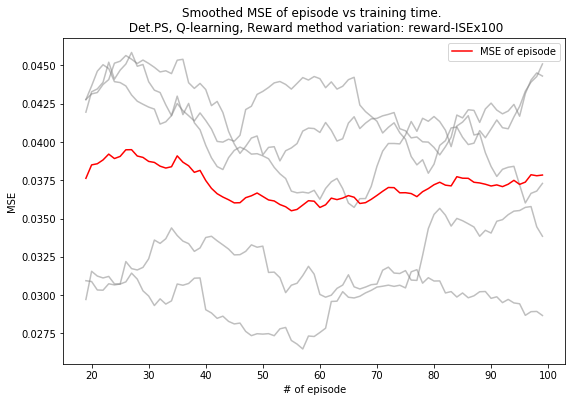

In [64]:
case = "reward-ISEx100"
df_rw2_avgsm_mses, perf_rw2, sig_rw2 = report_experiment(experiments_folder + case,
                             exp_name="\n {} {}".format(experiment_name, case), stochastic=False)

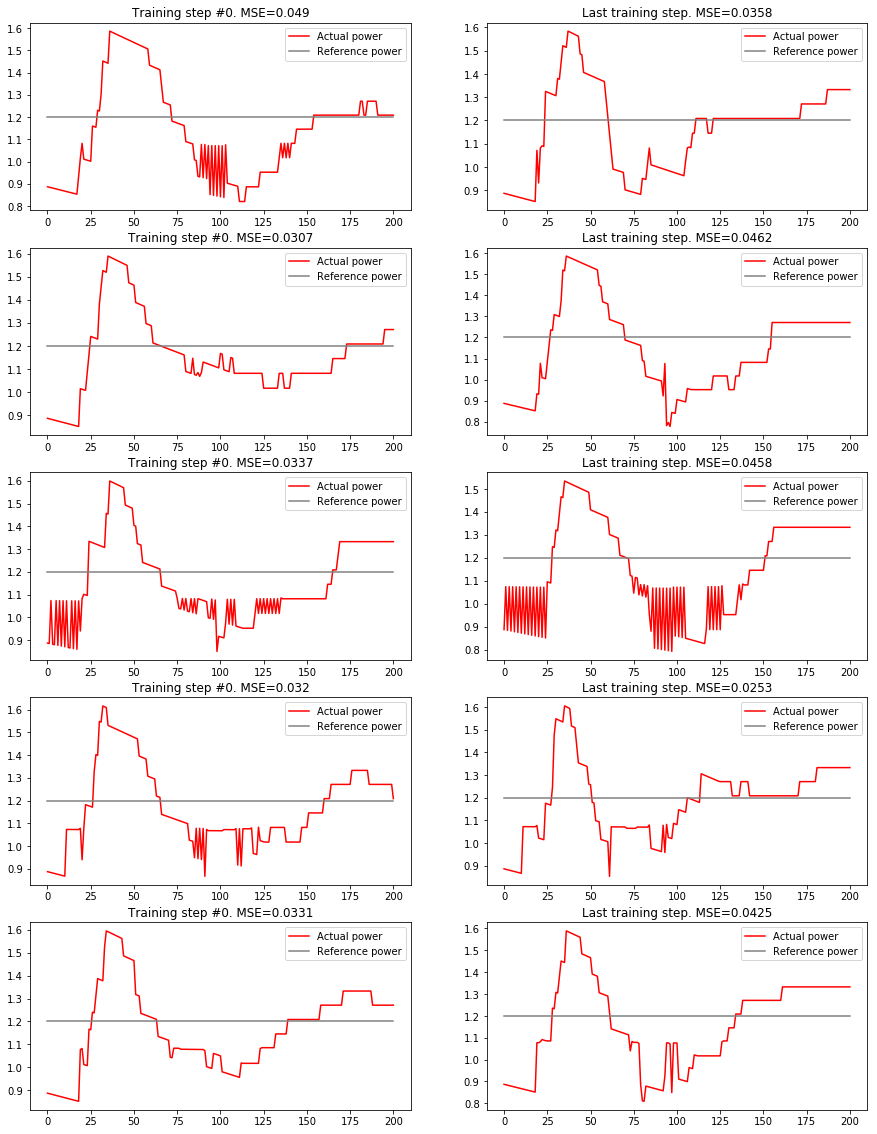

In [66]:
plot_sys_behaviour(experiments_folder + case)

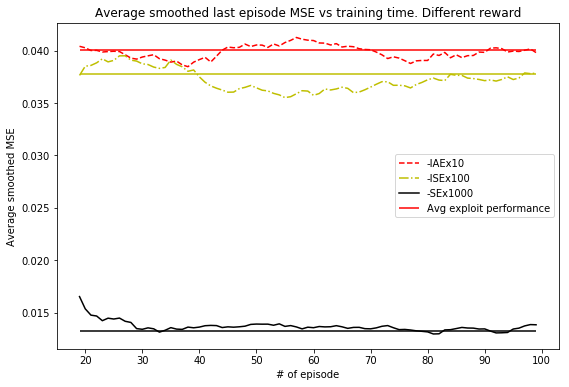

In [63]:
labels = ["-IAEx10", "-ISEx100", "-SEx1000"]
mses = [df_rw1_avgsm_mses, df_rw2_avgsm_mses, df_avgsm_mses_1]
perfs = [perf_rw1, perf_rw2, perf_1]
sigs = [sig_rw1, sig_rw2, sig_1]
report_experiment_summary("Different reward", mses, perfs, sigs, labels, 0)